# I -Loading all necessary pyhton Modules

In [1]:
# Scipy modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Sklearn and it's utilities
import sklearn
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import sklearn.metrics as metrics
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

# Clustering methods
#!pip install kmodes
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.cluster import DBSCAN

# Modules for evaluation and visualisation 
#!pip install yellowbrick
from kneed import KneeLocator
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.datasets.loaders import load_nfl

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler, OneHotEncoder
from sklearn.metrics import precision_score, recall_score

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer

In [2]:
# Extract files list's names from input folder
arr= os.listdir('C:/Users/AMC/Desktop/Projet - 05/archive.')
arr

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

# II-Loading all csv files on notebook

In [3]:
df_cust =pd.read_csv('C:/Users/AMC/Desktop/Projet - 05/archive/olist_customers_dataset.csv')
df_seller = pd.read_csv('C:/Users/AMC/Desktop/Projet - 05/archive/olist_sellers_dataset.csv')
df_geo =pd.read_csv('C:/Users/AMC/Desktop/Projet - 05/archive/olist_geolocation_dataset.csv')
df_or_items = pd.read_csv('C:/Users/AMC/Desktop/Projet - 05/archive/olist_order_items_dataset.csv')
df_or_pay = pd.read_csv('C:/Users/AMC/Desktop/Projet - 05/archive/olist_order_payments_dataset.csv')
df_or = pd.read_csv('C:/Users/AMC/Desktop/Projet - 05/archive/olist_orders_dataset.csv')
df_or_rev = pd.read_csv('C:/Users/AMC/Desktop/Projet - 05/archive/olist_order_reviews_dataset.csv')
df_prod = pd.read_csv('C:/Users/AMC/Desktop/Projet - 05/archive/olist_products_dataset.csv')

In [4]:
df_or.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


# III- Exploratory Data analysis : 
We have to check, treat and understand data 

## III-1 Check size and type of data :

#### - Data size :

In [5]:
datasets = [df_cust,df_seller,df_geo,df_or_items,df_or_pay,df_or,df_or_rev,df_prod]
titles = ["customers","sellers","geolocalisations", "items","payments", "orders","reviews", "products"]

info_df = pd.DataFrame({},)
info_df['dataset']= titles

info_df['no_of_columns']= [len(df.columns) for df in datasets ]
info_df['columns_name']= [', '.join(list(df.columns)) for df in datasets] 
info_df['no_of_rows'] = [len(df) for df in datasets]

info_df.style.background_gradient(cmap='viridis')

,dataset,no_of_columns,columns_name,no_of_rows
0,customers,5,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441
1,sellers,4,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095
2,geolocalisations,5,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163
3,items,7,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650
4,payments,5,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886
5,orders,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441
6,reviews,7,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224
7,products,9,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951


#### - Data types :

In [6]:
#checking dtypes
datasets = [df_cust,df_seller,df_geo,df_or_items,df_or_pay,df_or,df_or_rev,df_prod]
titles = ["customers","sellers","geolocalisations", "items","payments", "orders","reviews", "products"]

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_df = pd.DataFrame({},)
new_df['dataset']= titles

new_df['numeric_features'] = [len((df.select_dtypes(include=numerics)).columns) for df in datasets]
new_df['num_features_name'] = [', '.join(list((df.select_dtypes(include=numerics)).columns)) for df in datasets]
new_df['object_features'] = [len((df.select_dtypes(include='object')).columns) for df in datasets]
new_df['objt_features_name'] = [', '.join(list((df.select_dtypes(include='object')).columns)) for df in datasets]
new_df['bool_features'] = [len((df.select_dtypes(include='bool')).columns) for df in datasets]
new_df.style.background_gradient(cmap='viridis')

,dataset,numeric_features,num_features_name,object_features,objt_features_name,bool_features
0,customers,1,customer_zip_code_prefix,4,"customer_id, customer_unique_id, customer_city, customer_state",0
1,sellers,1,seller_zip_code_prefix,3,"seller_id, seller_city, seller_state",0
2,geolocalisations,3,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng",2,"geolocation_city, geolocation_state",0
3,items,3,"order_item_id, price, freight_value",4,"order_id, product_id, seller_id, shipping_limit_date",0
4,payments,3,"payment_sequential, payment_installments, payment_value",2,"order_id, payment_type",0
5,orders,0,,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",0
6,reviews,1,review_score,6,"review_id, order_id, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",0
7,products,7,"product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",2,"product_id, product_category_name",0


## III- 2 Merging datafrmes to get one useful set of data :

In [7]:
# All dataframes have in between one or more columns in commun
# We perform a merge according to a meaningful column for each pair of dataframe

In [8]:
df_merge_1 = pd.merge(left=df_cust, right=df_or, left_on='customer_id', right_on='customer_id')
df_merge_2 = pd.merge(left=df_merge_1, right=df_or_items, left_on='order_id', right_on='order_id')
df_merge_3 = pd.merge(left=df_merge_2, right=df_or_rev, left_on='order_id', right_on='order_id')
df_merge_4 = pd.merge(left=df_merge_3, right=df_prod, left_on='product_id', right_on='product_id')
df_merge_5 = pd.merge(left=df_merge_4, right=df_seller, left_on='seller_id', right_on='seller_id')
df_global = pd.merge(left=df_merge_5, right=df_or_pay, left_on='order_id', right_on='order_id')
print('Merged dataframe shape  :',df_global.shape)
print('*****************************************')
display(df_global.head(3))

Merged dataframe shape  : (117329, 39)
*****************************************


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,2,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,1,275.79
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,54.0,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,1,275.79


## III- 3 Correcting dtypes aspect for some columns :

In [9]:
# Identify date & time columns to cast them accordingly to the right data type
date_list = list(['order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date','order_approved_at','review_answer_timestamp','order_purchase_timestamp'])

In [10]:
date_list

['order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'shipping_limit_date',
 'review_creation_date',
 'order_approved_at',
 'review_answer_timestamp',
 'order_purchase_timestamp']

In [11]:
df_global[date_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   order_delivered_carrier_date   116094 non-null  object
 1   order_delivered_customer_date  114858 non-null  object
 2   order_estimated_delivery_date  117329 non-null  object
 3   shipping_limit_date            117329 non-null  object
 4   review_creation_date           117329 non-null  object
 5   order_approved_at              117314 non-null  object
 6   review_answer_timestamp        117329 non-null  object
 7   order_purchase_timestamp       117329 non-null  object
dtypes: object(8)
memory usage: 8.1+ MB


In [12]:
# Cast all 'date_list' columns to date format  : 
df_global[date_list] = df_global[date_list].astype('datetime64[ns]')
df_global[date_list].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117329 entries, 0 to 117328
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_delivered_carrier_date   116094 non-null  datetime64[ns]
 1   order_delivered_customer_date  114858 non-null  datetime64[ns]
 2   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 3   shipping_limit_date            117329 non-null  datetime64[ns]
 4   review_creation_date           117329 non-null  datetime64[ns]
 5   order_approved_at              117314 non-null  datetime64[ns]
 6   review_answer_timestamp        117329 non-null  datetime64[ns]
 7   order_purchase_timestamp       117329 non-null  datetime64[ns]
dtypes: datetime64[ns](8)
memory usage: 8.1 MB


## III- 4 Dropping duplicated rows :

Let's check and understand all column data to delete irrelevant (not needed) rows which give the same information. 

1- Treatment of duplicated rows and we perform that according to column 'customer_id' which is a code generated when any client apply for a transaction / it seems that some duplicated did exist in dataframe as a result of merging from different datasets

2- We have found the same duplicated rows number even if we add more columns as subset as ('customer_unique_id','order_purchase_timestamp','order_id')

In [13]:
df_global.duplicated(subset=['customer_id']).sum()

19413

In [14]:
df_global.duplicated(subset=['customer_id','customer_unique_id','order_purchase_timestamp','order_id']).sum()

19413

In [15]:
df_global.drop_duplicates(subset=['customer_id','customer_unique_id','order_purchase_timestamp','order_id'],keep='first', inplace=True)

In [16]:
df_global.shape

(97916, 39)

1- Customer identification is located on columns 'customer_id' & 'customer_unique_id'

2- A new 'customer_id' code is generated when an identified client applies for a command which makes all values of this column unique values

3- Each client is identified by a unique code put in 'customer_unique_id' and this column will be used to frequency purchasing calculation

In [17]:
print('**customer_id**',df_global['customer_id'].value_counts())
print('***********************************************************')
print('**customer_unique_id**' ,df_global['customer_unique_id'].value_counts())

**customer_id** 06b8999e2fba1a1fbc88172c00ba8bc7    1
31d301f727179ae52ba29009bb5add70    1
fce48cdc0473d52a614efabbb7820add    1
9687241c8ed4018450273e3fe23803b6    1
950087336d1384f2086620dd28246cba    1
                                   ..
e0c162c722b9ee73b89b93199e774b43    1
e288b145525a2a1b7f73fa9101f3904f    1
84fa5b5f1af3af75e2e44452c296e41d    1
9fcbe141e89de4f82d41cd5f300f5409    1
1ed0c832c2dd99570a59260e71768bdf    1
Name: customer_id, Length: 97916, dtype: int64
***********************************************************
**customer_unique_id** 8d50f5eadf50201ccdcedfb9e2ac8455    16
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
d9616a71aabda7c5e7cbfda3bfbc2d1b     1
a1edcb10815f406ded1350fa047c7a0d     1
92fbc23be50aff0204899b5516522eee     1
aee0c940f4ab71541887ec8e366b1e4c     1
82d46759af0369aad49084bacf85a6c3     1
Name: c

## III- 5 Identifying and handling missing values : 

In [18]:
titles = df_global.columns
missing_df = pd.DataFrame({},)
missing_df['column']= titles
missing_df['count_missing'] = [df_global[df].isna().sum() for df in titles ]
missing_df['mean_missing'] = [df_global[df].isnull().mean() for df in titles ]
display(missing_df)

,column,count_missing,mean_missing
0,customer_id,0,0.000000
1,customer_unique_id,0,0.000000
2,customer_zip_code_prefix,0,0.000000
3,customer_city,0,0.000000
4,customer_state,0,0.000000
5,order_id,0,0.000000
6,order_status,0,0.000000
7,order_purchase_timestamp,0,0.000000
8,order_approved_at,14,0.000143
9,order_delivered_carrier_date,991,0.010121


In [19]:
# Display only columns with missing values
missing_df.loc[missing_df['count_missing']>0]

,column,count_missing,mean_missing
8,order_approved_at,14,0.000143
9,order_delivered_carrier_date,991,0.010121
10,order_delivered_customer_date,2087,0.021314
20,review_comment_title,86454,0.882940
21,review_comment_message,57655,0.588821
24,product_category_name,1403,0.014329
25,product_name_lenght,1403,0.014329
26,product_description_lenght,1403,0.014329
27,product_photos_qty,1403,0.014329
28,product_weight_g,16,0.000163


In [20]:
#Creation of a list that contains all columns names
column_list = list(df_global.columns)

In [21]:
# Showing only Features with missing values
[features for features in df_global.columns if df_global[features].isnull().sum()>0]

['order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'review_comment_title',
 'review_comment_message',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

In [22]:
# procede to replacement of all missing values

In [23]:
df_global.shape

(97916, 39)

In [24]:
# Replacement of missing dates
df_global["order_approved_at"].fillna(df_global["order_purchase_timestamp"], inplace=True)
df_global["order_delivered_customer_date"].fillna(df_global["order_estimated_delivery_date"], inplace=True)
# Handling missing values of numerical features
df_global['product_weight_g'].fillna(df_global['product_weight_g'].median(),inplace=True)
df_global['product_length_cm'].fillna(df_global['product_length_cm'].median(),inplace=True)
df_global['product_height_cm'].fillna(df_global['product_height_cm'].median(),inplace=True)
df_global['product_width_cm'].fillna(df_global['product_width_cm'].median(),inplace=True)
# replacing product_cateory_name missing values by 'no_category' to avoid losing data about customer and eventually geo_ratios
df_global['product_category_name'].fillna('no_category',inplace=True)
# replacing product_cateory_name missing values by 'review_comment_message' by no_review
df_global['review_comment_message'].fillna('no_review',inplace=True)

In [25]:
# Dropping all irrelevant or repetetive columns 

In [26]:
df_global.drop('review_id',axis=1,inplace=True)
df_global.drop('review_comment_title',axis=1,inplace=True)
#dropping order delivery carrier date
df_global.drop(labels='order_delivered_carrier_date',axis=1,inplace=True)
#dropping 'product_name_lenght','product_description_lenght','product_photos_qty'
df_global.drop(labels='product_name_lenght',axis=1,inplace=True)
df_global.drop(labels='product_description_lenght',axis=1,inplace=True)
df_global.drop(labels='product_photos_qty',axis=1,inplace=True)
df_global.drop('order_id', axis=1, inplace=True)

In [27]:
# Check if there is still missing values

In [28]:
df_global.isna().sum().sum()

0

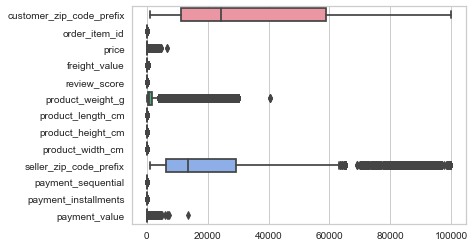

No remarkable outlier within data


In [29]:
# Check if there is some outliers by plotting boxplots for numerical columns
sns.boxplot(data=df_global, orient='h')
plt.show()
print('No remarkable outlier within data')

## III- 6 Understand data and perform some analysis : 

Get idea about how many : states, cities and zip_codes are used in all datasets 

In [30]:
print('************  Count of    : *****************')
print('1- cities   :',len(df_global['customer_city'].unique()))
print('2- states   :',len(df_global['customer_state'].unique()))
print('3- zip_codes   :',len(df_global['customer_zip_code_prefix'].unique()))
print('********************************************')

************  Count of    : *****************
1- cities   : 4108
2- states   : 27
3- zip_codes   : 14955
********************************************


In [31]:
# Exemple of zip_codes distribution within a city
# Check in the net if those zip_codes are really distributed as provided by dataset
# Url with all information : https://www.postcodesdb.com/AlphabeticSearch.aspx?country=Brazil&city=Santar%C3%A9m
santarem = df_global.loc[df_global['customer_city']=='santarem']
santarem['customer_zip_code_prefix'].value_counts()

68005    19
68040     7
68030     6
68010     5
68020     3
68025     2
68022     1
68035     1
Name: customer_zip_code_prefix, dtype: int64

In [32]:
numeric_cols_ = list(df_global.select_dtypes(include=['float64', 'int64'], exclude=['object','datetime64[ns]']))

In [33]:
numeric_cols_

['customer_zip_code_prefix',
 'order_item_id',
 'price',
 'freight_value',
 'review_score',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'seller_zip_code_prefix',
 'payment_sequential',
 'payment_installments',
 'payment_value']

Get some stats data about main numerical variables 

In [34]:
# Use describe command to get some stats for numerical variables 
df_global[numeric_cols_].describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000
mean,35174.983772,1.016494,125.748446,20.174040,4.105162,2100.469903,30.085961,16.473161,23.017096,24593.422801,1.022805,2.914835,157.742223
std,29822.392569,0.148882,189.949099,15.891107,1.331291,3763.819239,16.111278,13.315982,11.731499,27677.490470,0.250824,2.707027,216.861653
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,0.000000,0.010000
25%,11353.750000,1.000000,41.500000,13.250000,4.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,1.000000,1.000000,60.000000
50%,24422.000000,1.000000,79.000000,16.350000,5.000000,700.000000,25.000000,13.000000,20.000000,13560.000000,1.000000,2.000000,103.260000
75%,59032.750000,1.000000,139.900000,21.210000,5.000000,1800.000000,38.000000,20.000000,30.000000,29156.000000,1.000000,4.000000,174.990000
max,99990.000000,9.000000,6735.000000,409.680000,5.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,27.000000,24.000000,13664.080000


In [35]:
d = df_global[numeric_cols_].corr()

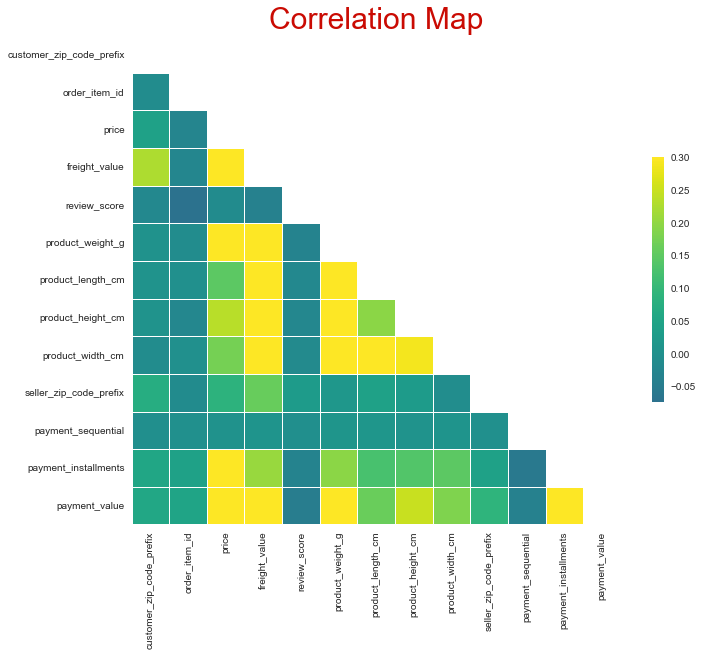

In [36]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(d, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap='viridis'

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(d, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Map',size='30',color='r')
plt.show()

Estimation of how many clients have purchased more than once

In [37]:
cust_unique = pd.DataFrame(df_cust['customer_unique_id'].value_counts())
cust_unique.loc[cust_unique['customer_unique_id']>1]
print('*************************************************************')
print('clients who have purchased more than once  ',cust_unique.loc[cust_unique['customer_unique_id']>1].shape[0])
print('clients who have purchased more than once ratio  :'"%.2f" % (100* cust_unique.loc[cust_unique['customer_unique_id']>1].shape[0]/df_cust.shape[0]),'%')
print('*************************************************************')

*************************************************************
clients who have purchased more than once   2997
clients who have purchased more than once ratio  :3.01 %
*************************************************************


In [38]:
cust_unique_ = cust_unique.loc[cust_unique['customer_unique_id']>1]

In [39]:
# There is no missing value in 'customer_unique_id', so we can perform some data analysis 
cust_unique.customer_unique_id.isna().sum()

0

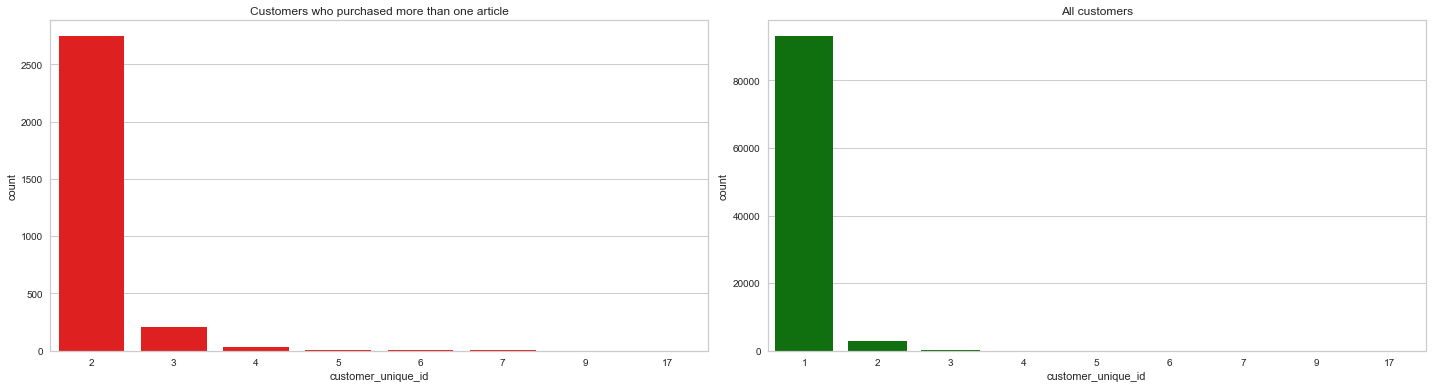

In [40]:
plt.rcParams["figure.figsize"] = [20.00, 5.50]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(1, 2)
axes[0].set_title("Customers who purchased more than one article")
axes[1].set_title("All customers")
sns.countplot(x=cust_unique_['customer_unique_id'], color="red", ax=axes[0])
sns.countplot(x=cust_unique['customer_unique_id'],  color="green", ax=axes[1])
plt.show()
# We can see below the difference between casual and with some loyalty customers 

In [41]:
df = df_global

In [42]:
df.loc[df['payment_value']<0]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value


In [49]:
df['payment_value'].value_counts(bins=10)

(-13.655, 1366.417]       97379
(1366.417, 2732.824]        475
(2732.824, 4099.231]         49
(4099.231, 5465.638]          8
(5465.638, 6832.045]          2
(6832.045, 8198.452]          2
(12297.673, 13664.08]         1
(8198.452, 9564.859]          0
(9564.859, 10931.266]         0
(10931.266, 12297.673]        0
Name: payment_value, dtype: int64

In [44]:
df['transaction']=1

In [50]:
mm = pd.DataFrame(df.groupby(['customer_state'])['payment_value','review_score','transaction'].sum())

C:\Users\AMC\AppData\Local\Temp\ipykernel_2128\770291462.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mm = pd.DataFrame(df.groupby(['customer_state'])['payment_value','review_score','transaction'].sum())


In [51]:
mm = mm.reset_index()

In [52]:
mm.head(3)

,customer_state,payment_value,review_score,transaction
0,AC,19067.33,328,81
1,AL,92898.15,1538,408
2,AM,27374.72,612,145


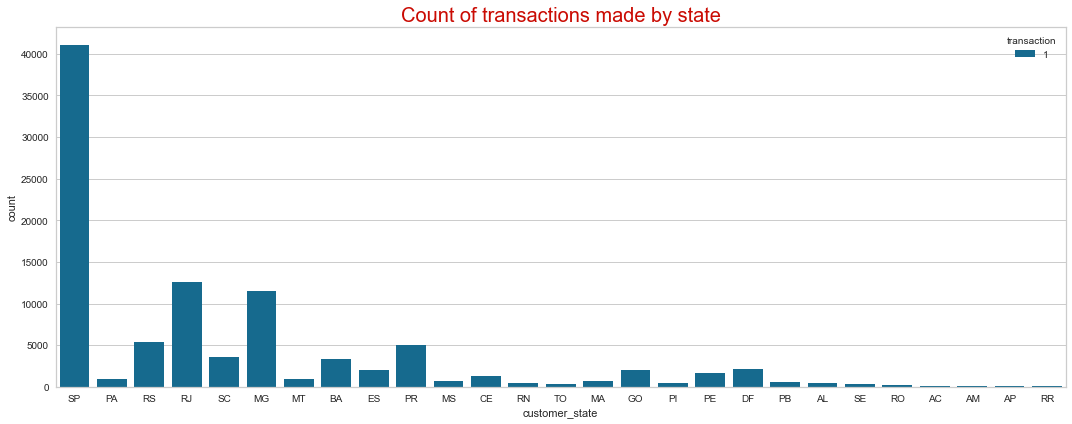

In [53]:
plt.figure(figsize=(15,6))
sns.countplot(x=df['customer_state'],hue=df['transaction'])
plt.title('Count of transactions made by state',size='20',color='r')
plt.show()

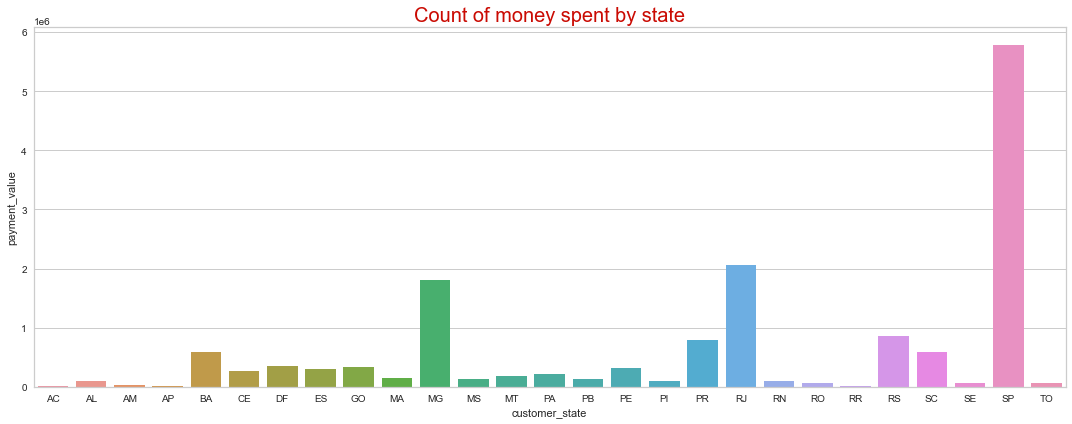

In [54]:
plt.figure(figsize=(15,6))
sns.barplot(x = 'customer_state',
            y = 'payment_value',
               data = mm)
plt.title('Count of money spent by state',size='20',color='r')
plt.show()

In [55]:
print(50*'*')
print('Number of products types  :',len(df['product_category_name'].unique()))
print(50*'*')

**************************************************
Number of products types  : 74
**************************************************


In [56]:
df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,transaction
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05,...,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,2,146.87,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-28 00:09:50,2017-12-19,...,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,1,275.79,1


# IV - CUSTOMER SEGMENTATION

## IV-1  RFM clustering and Analysis :      

RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

Recency: How recently has the customer made a transaction

Frequency: How frequent is the customer in ordering/buying some product

Monetary: How much does the customer spend on purchasing products.RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

In [57]:
df[numeric_cols_].describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,review_score,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value
count,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000,97916.000000
mean,35174.983772,1.016494,125.748446,20.174040,4.105162,2100.469903,30.085961,16.473161,23.017096,24593.422801,1.022805,2.914835,157.742223
std,29822.392569,0.148882,189.949099,15.891107,1.331291,3763.819239,16.111278,13.315982,11.731499,27677.490470,0.250824,2.707027,216.861653
min,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1.000000,0.000000,0.010000
25%,11353.750000,1.000000,41.500000,13.250000,4.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,1.000000,1.000000,60.000000
50%,24422.000000,1.000000,79.000000,16.350000,5.000000,700.000000,25.000000,13.000000,20.000000,13560.000000,1.000000,2.000000,103.260000
75%,59032.750000,1.000000,139.900000,21.210000,5.000000,1800.000000,38.000000,20.000000,30.000000,29156.000000,1.000000,4.000000,174.990000
max,99990.000000,9.000000,6735.000000,409.680000,5.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,27.000000,24.000000,13664.080000


In [58]:
# Calculating 'Recency'
df_recency = df.groupby(by='customer_unique_id',as_index=False)['order_purchase_timestamp'].max()

In [59]:
df_recency

,customer_unique_id,order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
94716,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
94717,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
94718,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [60]:
# Rename columns according to recency method
df_recency.columns = ['CustomerCode', 'LastPurchaseDate']

In [61]:
recent_date = df_recency['LastPurchaseDate'].max()
df_recency['Recency'] = df_recency['LastPurchaseDate'].apply(
    lambda x: (recent_date - x).days)
df_recency.head(3)

,CustomerCode,LastPurchaseDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,118
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,541


In [62]:
df_recency.shape

(94720, 3)

In [63]:
# Calculating Frequency

frequency_df = df.drop_duplicates().groupby(
    by=['customer_unique_id'], as_index=False)['order_purchase_timestamp'].count()
frequency_df.columns = ['CustomerCode', 'Frequency']
frequency_df.head()

,CustomerCode,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [64]:
frequency_df.shape

(94720, 2)

In [65]:
# Calculation monetary value 

monetary_df = df.groupby(by='customer_unique_id', as_index=False)['payment_value'].sum()
monetary_df.columns = ['CustomerCode', 'Monetary']
monetary_df.head()

,CustomerCode,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [66]:
monetary_df.shape

(94720, 2)

In [67]:
# Merging all 3 dataframes in one dataframe

rf_df = df_recency.merge(frequency_df, on='CustomerCode')
rfm_df = rf_df.merge(monetary_df, on='CustomerCode').drop(
    columns='LastPurchaseDate')
rfm_df.head()

,CustomerCode,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19
2,0000f46a3911fa3c0805444483337064,541,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89


In [68]:
rfm_df.shape

(94720, 4)

Ranking Customer’s based upon their recency, frequency, and monetary score

Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [69]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,CustomerCode,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,76.153927,48.486064,48.486064
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,75.121938,48.486064,48.486064
2,0000f46a3911fa3c0805444483337064,541,1,86.22,3.592166,48.486064,48.486064
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.62,28.791174,48.486064,48.486064
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.89,33.800148,48.486064,48.486064


## IV-2  Calculating RFM score

RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. 

Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [70]:
# Calculating RFM score


rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['CustomerCode', 'RFM_Score']].head(7)

,CustomerCode,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,2.63
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2.62
2,0000f46a3911fa3c0805444483337064,2.09
3,0000f6ccb0745a6a4b88665a16c9f078,2.28
4,0004aac84e0df4da2b147fca70cf8255,2.31
5,0004bd2a26a76fe21f786e4fbd80607f,2.57
6,00050ab1314c0e55a6ca13cf7181fecf,2.59


In [71]:
rfm_df['RFM_Score'].max()

5.0

## IV- 3 Rating Customer based upon the RFM score : 

rfm score >4.5 : Top Customer

4.5 > rfm score > 4 : High Value Customer

4>rfm score >3 : Medium value customer

3>rfm score>1.6 : Low-value customer

rfm score<1.6 :Lost Customer

In [72]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
									4.5, "Top Customers",
									(np.where(
										rfm_df['RFM_Score'] > 4,
										"High value Customer",
										(np.where(
	rfm_df['RFM_Score'] > 3,
							"Medium Value Customer",
							np.where(rfm_df['RFM_Score'] > 1.6,
							'Low Value Customers', 'Lost Customers'))))))
rfm_df[['CustomerCode', 'RFM_Score', 'Customer_segment']].head(5)


,CustomerCode,RFM_Score,Customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2.63,Low Value Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2.62,Low Value Customers
2,0000f46a3911fa3c0805444483337064,2.09,Low Value Customers
3,0000f6ccb0745a6a4b88665a16c9f078,2.28,Low Value Customers
4,0004aac84e0df4da2b147fca70cf8255,2.31,Low Value Customers


In [73]:
rfm_df['Customer_segment'].value_counts()

Low Value Customers    91851
Top Customers           1754
High value Customer     1115
Name: Customer_segment, dtype: int64

Global period of time for this dataframe

In [74]:
df['order_purchase_timestamp'].min()

Timestamp('2016-09-04 21:15:19')

In [75]:
df['order_delivered_customer_date'].max()

Timestamp('2018-10-17 13:22:46')

In [76]:
date_list

['order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'shipping_limit_date',
 'review_creation_date',
 'order_approved_at',
 'review_answer_timestamp',
 'order_purchase_timestamp']

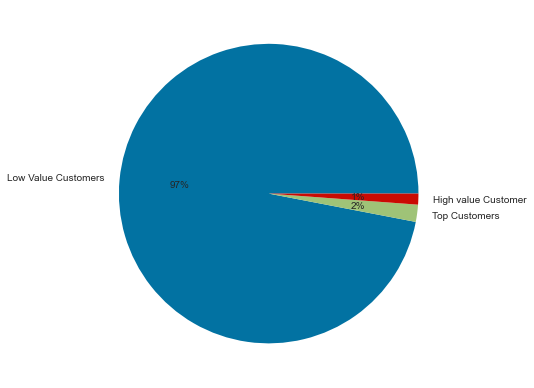

In [77]:
plt.pie(rfm_df.Customer_segment.value_counts(),
		labels=rfm_df.Customer_segment.value_counts().index,
		autopct='%.0f%%')
plt.show()


In [ ]:
# Save a copy of dataset on drive
rfm_df.to_csv('rfm_df.csv',index=False)

# V- FEATURE ENGINEERING :

We have to perform some feature engineering to finalize our dataframe :    


We use dataframe containing zip_codes of all cities as dictionnary to introduce geo coordinates in our dataframe for each zip_code

In [78]:
df.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,transaction
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05,...,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,2,146.87,1
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-28 00:09:50,2017-12-19,...,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,1,275.79,1
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-26 09:54:04,2017-06-12,...,64.0,31.0,8577,itaquaquecetuba,SP,1,credit_card,7,140.61,1


In [79]:
df.shape 

(97916, 33)

In [80]:
df_geo.shape

(1000163, 5)

In [81]:
df_geo.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


In [82]:
df_geo_seller = df_geo

In [83]:
df_geo_seller.drop(['geolocation_city','geolocation_state'], axis=1,inplace=True)

In [84]:
df_geo_customer = df_geo_seller

In [85]:
df_geo_seller.rename(columns = {'geolocation_zip_code_prefix':'seller_zip_code_prefix','geolocation_lat':'seller_geolocation_lat','geolocation_lng':'seller_geolocation_lng'}, inplace = True)

In [86]:
print(df_geo_seller.shape)
df_geo_seller.head(3)

(1000163, 3)


,seller_zip_code_prefix,seller_geolocation_lat,seller_geolocation_lng
0,1037,-23.545621,-46.639292
1,1046,-23.546081,-46.644820
2,1046,-23.546129,-46.642951


In [87]:
# Eliminate all duplicated rows in geo_seller dataframe
print('count of duplicated    : ',df_geo_seller.duplicated(subset='seller_zip_code_prefix').sum())
print('*************************************************************************')
print('Deleting all duplicated rows    : ')
df_geo_seller.drop_duplicates(subset='seller_zip_code_prefix',keep='first',inplace=True)
print('df_geo_seller new shape   :',df_geo_seller.shape[0])

count of duplicated    :  981148
*************************************************************************
Deleting all duplicated rows    : 
df_geo_seller new shape   : 19015


In [88]:
merge_seller = pd.merge(df,
                 df_geo_seller,
                 on='seller_zip_code_prefix', how='left')
print('df initial shape  :',df.shape)
print('shape of merged dataframe',merge_seller.shape)

df initial shape  : (97916, 33)
shape of merged dataframe (97916, 35)


In [89]:
df_geo_customer.rename(columns = {'seller_zip_code_prefix':'customer_zip_code_prefix','seller_geolocation_lat':'customer_geolocation_lat','seller_geolocation_lng':'customer_geolocation_lng'}, inplace = True)

In [90]:
print(df_geo_customer.shape)
df_geo_customer.head(3)

(19015, 3)


,customer_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng
0,1037,-23.545621,-46.639292
1,1046,-23.546081,-46.644820
3,1041,-23.544392,-46.639499


In [91]:
df=merge_seller

In [92]:
df.shape

(97916, 35)

In [93]:
df = pd.merge(df,
                 df_geo_customer,
                 on='customer_zip_code_prefix', how='left')
print('df initial shape  :',df.shape)
print('shape of merged dataframe',df.shape)

df initial shape  : (97916, 37)
shape of merged dataframe (97916, 37)


In [94]:
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,seller_state,payment_sequential,payment_type,payment_installments,payment_value,transaction,seller_geolocation_lat,seller_geolocation_lng,customer_geolocation_lat,customer_geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05,...,SP,1,credit_card,2,146.87,1,-23.482623,-46.37449,-20.509897,-47.397866
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-28 00:09:50,2017-12-19,...,SP,1,credit_card,1,275.79,1,-23.482623,-46.37449,-2.442747,-54.728950
2,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-26 09:54:04,2017-06-12,...,SP,1,credit_card,7,140.61,1,-23.482623,-46.37449,-29.856534,-51.268958
3,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-28 21:09:00,2018-03-22,...,SP,1,credit_card,10,137.58,1,-23.482623,-46.37449,-22.627556,-43.159942
4,fd3a0b1bd209f0e7d420c9c3d1127613,567ab47ca4deb92d46dbf54dce07d0a7,88460,angelina,SC,delivered,2017-03-23 15:10:17,2017-03-23 15:25:11,2017-04-11 10:16:56,2017-04-24,...,SP,1,credit_card,5,142.05,1,-23.482623,-46.37449,-27.585796,-48.984037


In [95]:
df.isna().sum()

customer_id                        0
customer_unique_id                 0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_customer_date      0
order_estimated_delivery_date      0
order_item_id                      0
product_id                         0
seller_id                          0
shipping_limit_date                0
price                              0
freight_value                      0
review_score                       0
review_comment_message             0
review_creation_date               0
review_answer_timestamp            0
product_category_name              0
product_weight_g                   0
product_length_cm                  0
product_height_cm                  0
product_width_cm                   0
seller_zip_code_prefix             0
seller_city                        0
s

In [96]:
df['seller_geolocation_lat']=df.groupby(['seller_state'])['seller_geolocation_lat'].apply(lambda x:x.fillna(x.mean()))
df['seller_geolocation_lng']=df.groupby(['seller_state'])['seller_geolocation_lng'].apply(lambda x:x.fillna(x.mean()))
df['customer_geolocation_lat']=df.groupby(['customer_state'])['customer_geolocation_lat'].apply(lambda x:x.fillna(x.mean()))
df['customer_geolocation_lng']=df.groupby(['customer_state'])['customer_geolocation_lng'].apply(lambda x:x.fillna(x.mean()))

In [97]:
df.isna().sum().sum()

0

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97916 entries, 0 to 97915
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    97916 non-null  object        
 1   customer_unique_id             97916 non-null  object        
 2   customer_zip_code_prefix       97916 non-null  int64         
 3   customer_city                  97916 non-null  object        
 4   customer_state                 97916 non-null  object        
 5   order_status                   97916 non-null  object        
 6   order_purchase_timestamp       97916 non-null  datetime64[ns]
 7   order_approved_at              97916 non-null  datetime64[ns]
 8   order_delivered_customer_date  97916 non-null  datetime64[ns]
 9   order_estimated_delivery_date  97916 non-null  datetime64[ns]
 10  order_item_id                  97916 non-null  int64         
 11  product_id     

In [99]:
# calculate distance between seller and customer to be able to include positions within analysis
df['distance'] = np.sqrt((df['seller_geolocation_lat'] - df['customer_geolocation_lat'])**2 + (df['seller_geolocation_lng'] - df['customer_geolocation_lng'])**2)

In [100]:
df['distance']

0         3.143946
1        22.637876
2         8.036327
3         3.326328
4         4.862691
           ...    
97911     2.257041
97912    13.988352
97913     0.265909
97914    11.043808
97915     0.633391
Name: distance, Length: 97916, dtype: float64

In [101]:
df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'review_score', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'transaction',
       'seller_geolocation_lat', 'seller_geolocation_lng',
       'customer_geolocation_lat', 'customer_geolocation_lng', 'distance'],
      dtype='object')

In [102]:
# Define prodcut_volume to replace product shape specifications
df['prodcut_volume'] = df['product_length_cm']*df['product_height_cm']*df['product_width_cm']

In [103]:
#We can drop all shape specifications columns 
df.drop(['product_length_cm','product_height_cm','product_width_cm'], axis=1,inplace=True)

In [106]:
date_list

['order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'shipping_limit_date',
 'review_creation_date',
 'order_approved_at',
 'review_answer_timestamp',
 'order_purchase_timestamp']

In [107]:
date_list

['order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'shipping_limit_date',
 'review_creation_date',
 'order_approved_at',
 'review_answer_timestamp',
 'order_purchase_timestamp']

In [108]:
date_list.remove('order_delivered_carrier_date')

In [109]:
df[date_list].head(2)

,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,review_creation_date,order_approved_at,review_answer_timestamp,order_purchase_timestamp
0,2017-05-25 10:35:35,2017-06-05,2017-05-22 15:22:12,2017-05-26,2017-05-16 15:22:12,2017-05-30 22:34:40,2017-05-16 15:05:35
1,2017-11-28 00:09:50,2017-12-19,2017-11-23 00:47:18,2017-11-29,2017-11-10 00:47:48,2017-12-01 19:41:59,2017-11-09 00:50:13


In [110]:
# Define 'delivery time' 
df['delivery_time_d'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
# Define 'proposed delivery time'
df['proposed_delivery_time_d'] = (df['order_estimated_delivery_date'] - df['order_purchase_timestamp']).dt.days
# Define 'delay between proposed and effective delivery time'
df['Diff_delivery_time_d'] = (df['order_estimated_delivery_date'] - df['order_delivered_customer_date']).dt.days
# Define 'delay between review_answer and review_creation time' 
df['Diff_review_time_d'] = (df['review_answer_timestamp'] - df['review_creation_date']).dt.days
# Define 'shipping time limit from order_approved_time'
df['Diff_shipping_limit_ord_app'] = (df['shipping_limit_date'] - df['order_approved_at']).dt.days

In [111]:
df['Diff_shipping_limit_ord_app'] = (df['shipping_limit_date'] - df['order_approved_at']).dt.days

In [112]:
df[['delivery_time_d','proposed_delivery_time_d','Diff_delivery_time_d','Diff_review_time_d','Diff_shipping_limit_ord_app','distance']].head(2)

,delivery_time_d,proposed_delivery_time_d,Diff_delivery_time_d,Diff_review_time_d,Diff_shipping_limit_ord_app,distance
0,8,19,10,4,6,3.143946
1,18,39,20,2,12,22.637876


In [113]:
df.loc[df['Diff_delivery_time_d']<0].shape

(7661, 41)

## Include RFM data into dataframe to be analyzed

In [141]:
rfm = pd.read_csv('rfm_df.csv')

In [142]:
rfm.head(2)

,CustomerCode,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,76.15,48.49,48.49,2.63,Low Value Customers
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,75.12,48.49,48.49,2.62,Low Value Customers


In [143]:
rfm.drop(['R_rank_norm','F_rank_norm','M_rank_norm','RFM_Score','Customer_segment'],axis=1,inplace=True)

In [144]:
rfm.head(2)

,CustomerCode,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19


In [145]:
rfm.rename(columns={'CustomerCode':'customer_unique_id'},inplace=True)

In [ ]:
# Merge this dataframe to data

In [147]:
df_final = pd.merge(df,rfm,left_on='customer_unique_id',right_on='customer_unique_id')

In [150]:
df.shape

(97916, 41)

In [149]:
df_final.shape

(97916, 44)

In [151]:
# Save a copy of dataset on drive
df_final.to_csv('data.csv',index=False)

In [153]:
df_final.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,distance,prodcut_volume,delivery_time_d,proposed_delivery_time_d,Diff_delivery_time_d,Diff_review_time_d,Diff_shipping_limit_ord_app,Recency,Frequency,Monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05,...,3.143946,107136.0,8,19,10,4,6,474,1,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-28 00:09:50,2017-12-19,...,22.637876,107136.0,18,39,20,2,12,298,1,275.79


# VI- CLUSTERING USING UNSUPERVISED ALGORITHMS :

## VI-1  K_MEANS CLUSTERING :

k-MEANS USES ONLY NUMERIC VARIABLES THIS IS WHY WE HAVE TO ELIMINATE ALL CATEGORICAL FEATURES

In [154]:
list_to_delete = list(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix','customer_city', 'customer_state', 'order_status','order_purchase_timestamp', 'order_approved_at',
                      'order_delivered_customer_date', 'order_estimated_delivery_date','order_item_id', 'product_id', 'seller_id', 'shipping_limit_date','review_comment_message',
                      'review_creation_date', 'review_answer_timestamp','transaction','seller_geolocation_lat', 'seller_geolocation_lng','customer_geolocation_lat', 'customer_geolocation_lng','product_category_name',
                       'payment_type','seller_zip_code_prefix','seller_city','seller_state','payment_sequential','price', 'freight_value',
                      'Diff_delivery_time_d','Diff_review_time_d', 'Diff_shipping_limit_ord_app','proposed_delivery_time_d'])

In [155]:
df_km = pd.read_csv('data.csv')

In [156]:
df_km.drop(list_to_delete,axis=1,inplace=True)

 We keep only relevant feature for our clustering

In [157]:
df_km.columns

Index(['review_score', 'product_weight_g', 'payment_installments',
       'payment_value', 'distance', 'prodcut_volume', 'delivery_time_d',
       'Recency', 'Frequency', 'Monetary'],
      dtype='object')

In [158]:
df_km.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97916 entries, 0 to 97915
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_score          97916 non-null  int64  
 1   product_weight_g      97916 non-null  float64
 2   payment_installments  97916 non-null  int64  
 3   payment_value         97916 non-null  float64
 4   distance              97916 non-null  float64
 5   prodcut_volume        97916 non-null  float64
 6   delivery_time_d       97916 non-null  int64  
 7   Recency               97916 non-null  int64  
 8   Frequency             97916 non-null  int64  
 9   Monetary              97916 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 7.5 MB


In [159]:
df_km.head(2)

,review_score,product_weight_g,payment_installments,payment_value,distance,prodcut_volume,delivery_time_d,Recency,Frequency,Monetary
0,4,8683.0,2,146.87,3.143946,107136.0,8,474,1,146.87
1,1,8683.0,1,275.79,22.637876,107136.0,18,298,1,275.79


In [160]:
# Scaling the data 
scaler = MinMaxScaler()
X = scaler.fit_transform(df_km)

In [161]:
X.shape

(97916, 10)

‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
See section Notes in k_init for more details.

In [163]:
kmeans = KMeans(n_clusters=10,init='k-means++' )
kmeans.fit(X)

KMeans(n_clusters=10)

In [164]:
kmeans.labels_

array([3, 1, 3, ..., 9, 6, 1])

In [165]:
kmeans.predict(X)

array([3, 1, 3, ..., 9, 6, 1])

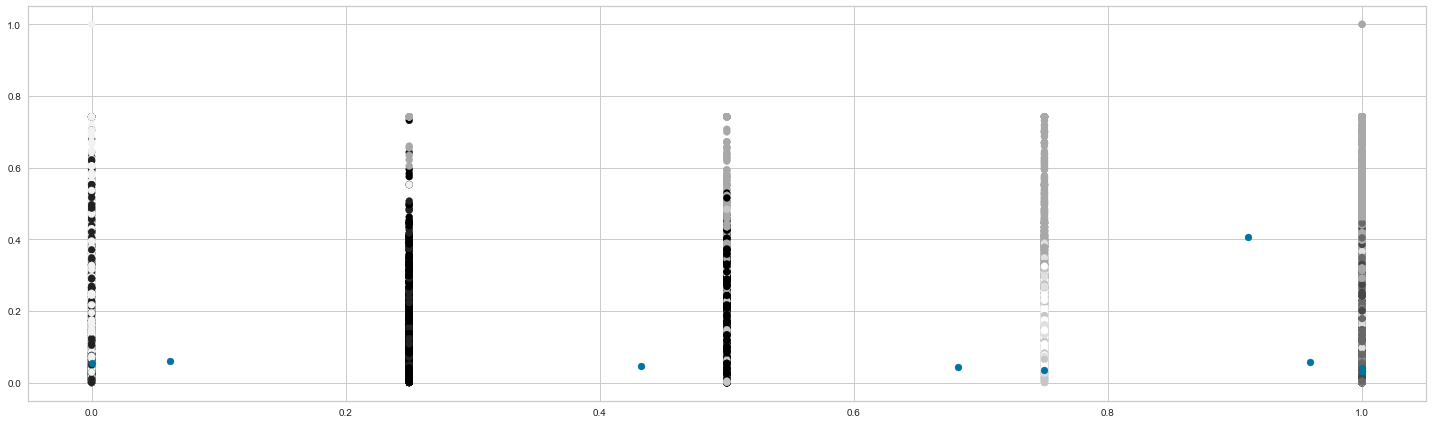

In [166]:
plt.figure(figsize=(20, 6))
plt.scatter(X[:,0],X[:,1], c=kmeans.predict(X))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],cmap='viridis')
plt.show()

In [167]:
# How to get values of each cluster as a dataframe 
cluster_01 = kmeans.predict(X) ==1

In [169]:
df_final[cluster_01].describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,review_score,product_weight_g,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,...,distance,prodcut_volume,delivery_time_d,proposed_delivery_time_d,Diff_delivery_time_d,Diff_review_time_d,Diff_shipping_limit_ord_app,Recency,Frequency,Monetary
count,7934.000000,7934.000000,7934.000000,7934.000000,7934.000000,7934.000000,7934.000000,7934.000000,7934.000000,7934.000000,...,7934.000000,7934.000000,7934.000000,7934.000000,7934.000000,7934.000000,7934.000000,7934.000000,7934.000000,7934.000000
mean,35762.028611,1.044870,137.252870,21.813191,1.000378,2289.102470,23164.730149,1.020418,3.114570,189.998010,...,6.240467,15928.017520,21.990799,23.753718,1.428787,2.159314,6.127048,173.472523,1.063776,200.397318
std,28356.149050,0.242894,208.210182,18.503454,0.019443,4150.327481,26919.464514,0.188772,2.873238,268.661513,...,5.800477,24443.424484,15.441371,8.495368,14.950042,6.326136,3.557100,80.543610,0.289688,277.231445
min,1007.000000,1.000000,3.540000,0.000000,1.000000,50.000000,1021.000000,1.000000,1.000000,0.090000,...,0.000000,352.000000,0.000000,2.000000,-189.000000,0.000000,-5.000000,0.000000,1.000000,0.280000
25%,13087.250000,1.000000,44.990000,14.100000,1.000000,300.000000,6162.000000,1.000000,1.000000,68.792500,...,2.725945,2816.000000,10.000000,19.000000,-7.000000,0.000000,4.000000,116.000000,1.000000,71.140000
50%,26291.000000,1.000000,81.000000,17.250000,1.000000,700.000000,13476.000000,1.000000,2.000000,121.500000,...,4.511476,6100.000000,19.000000,23.000000,0.000000,1.000000,6.000000,181.000000,1.000000,127.890000
75%,58321.000000,1.000000,149.000000,22.850000,1.000000,1850.000000,21840.000000,1.000000,4.000000,205.915000,...,7.898671,19356.000000,31.000000,28.000000,12.000000,2.000000,6.000000,235.000000,1.000000,218.990000
max,99704.000000,6.000000,3109.990000,294.760000,2.000000,40425.000000,99730.000000,7.000000,24.000000,7274.880000,...,73.653573,288000.000000,208.000000,74.000000,48.000000,237.000000,50.000000,315.000000,9.000000,7274.880000


In [170]:
# Estimate kmeans inertia
kmeans.inertia_

3768.987478561321

In [172]:
kmeans.score(X)

-3768.987478561321

ELBOW METHOD FOR 'K' CHOOSING & OPTIMISATION

Elbow method is one of the most popular method used to select the optimal number of clusters by fitting the model with a range of values for K in K-means algorithm. Elbow method requires drawing a line plot between SSE (Sum of Squared errors) vs number of clusters and finding the point representing the “elbow point” (the point after which the SSE or inertia starts decreasing in a linear fashion). Here is the sample elbow point. In the later sections, it is illustrated as to how to draw the line plot and find elbow point. 

The elbow point represents the point in the SSE / Inertia plot where SSE or inertia starts decreasing in a linear manner. 

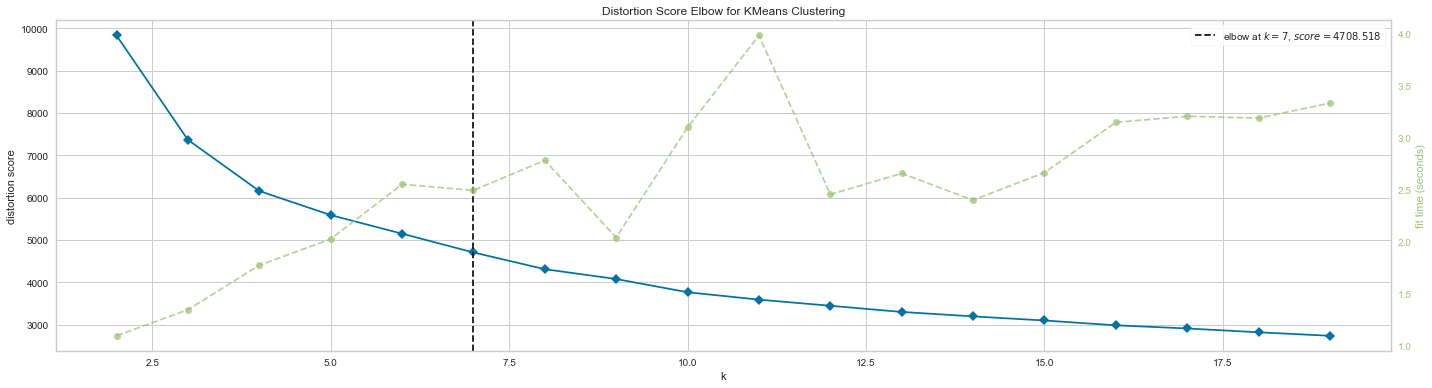

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [173]:
model = KMeans(init='k-means++')
visualizer = KElbowVisualizer(model, k=(2,20))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. In order to calculate the Silhouette score for each observation / data point, the following distances need to be found out for each observations belonging to all the clusters:

* - Mean distance between the observation and all other data points in the same cluster. This distance can also be called as mean intra-cluster distance. The mean distance is denoted by 'a'

* - Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called as mean nearest-cluster distance. The mean distance is denoted by 'b'

Silhouette score, S, for each sample is calculated using the following formula:

S=(b–a)/max(a,b)

The value of Silhouette score varies from -1 to 1. If the score is 1, the cluster is dense and well-separated than other clusters. A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighbouring clusters. A negative score [-1, 0] indicate that the samples might have got assigned to the wrong clusters.

In [174]:
from yellowbrick.cluster import SilhouetteVisualizer

In [175]:
import matplotlib.cm as cm

In [176]:
range_n_clusters = [5,6,7,8,9]

For n_clusters = 5 The average silhouette_score is : 0.31199093403572264
For n_clusters = 6 The average silhouette_score is : 0.27576070817497084
For n_clusters = 7 The average silhouette_score is : 0.28101718843080825
For n_clusters = 8 The average silhouette_score is : 0.2651033029107298
For n_clusters = 9 The average silhouette_score is : 0.27320497216380946


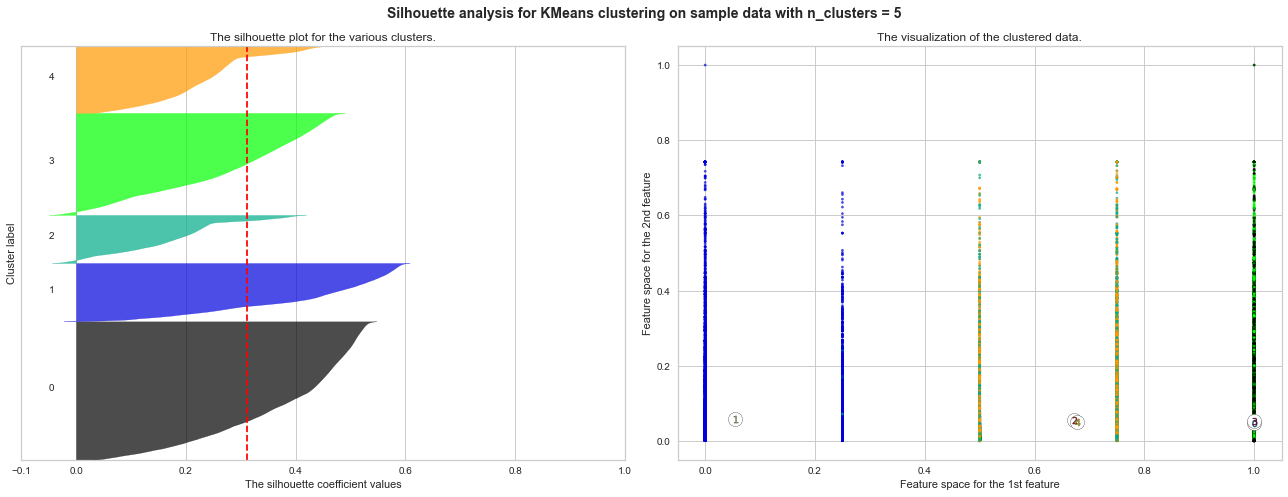

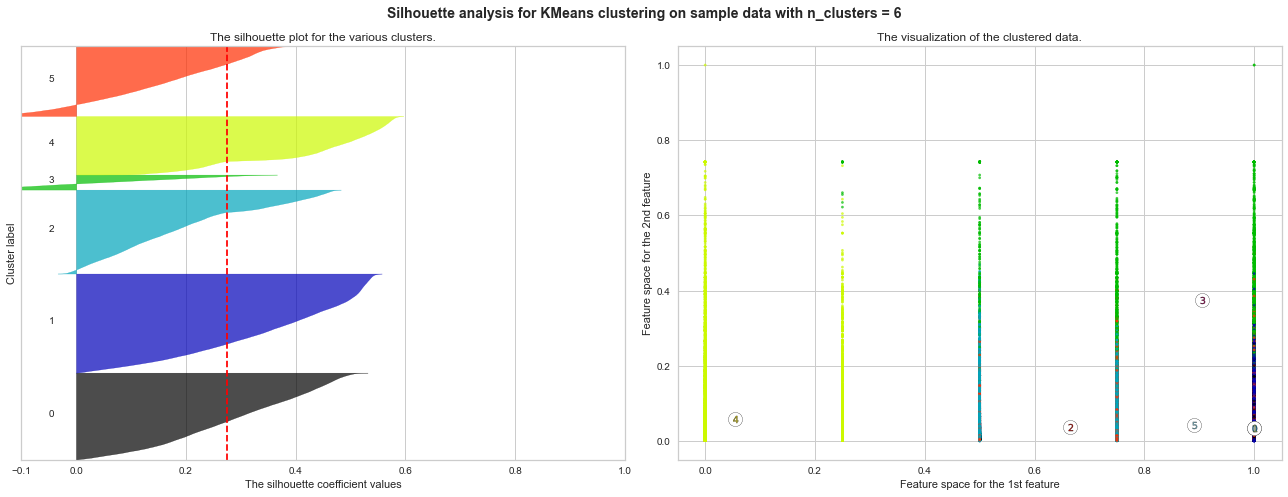

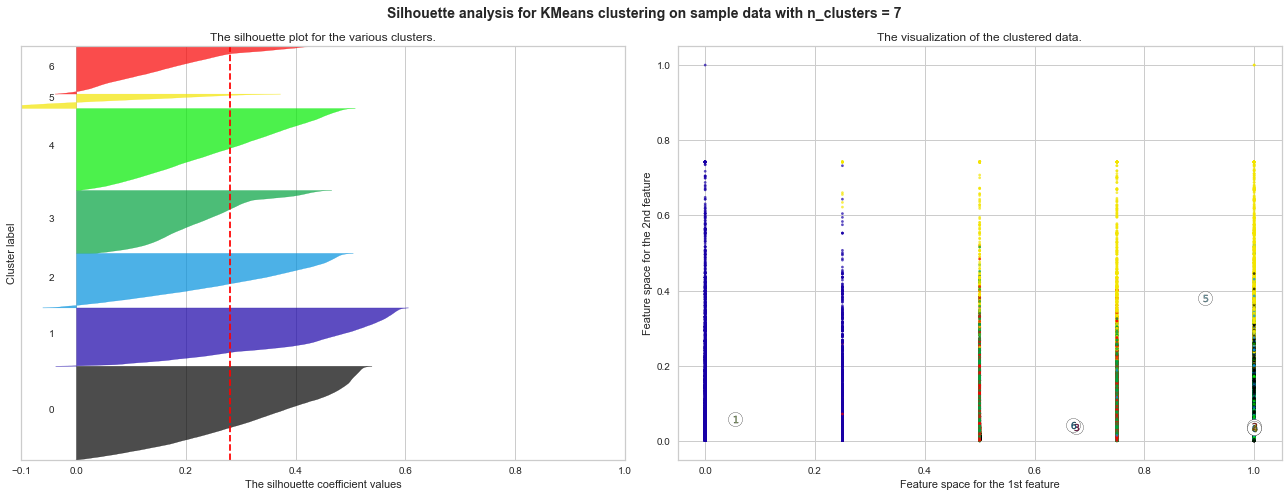

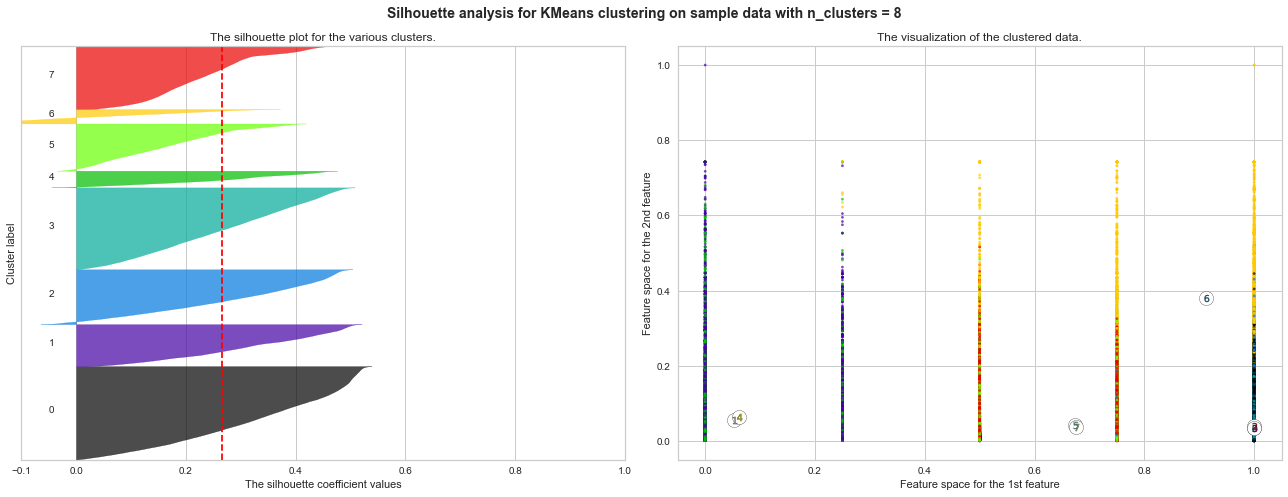

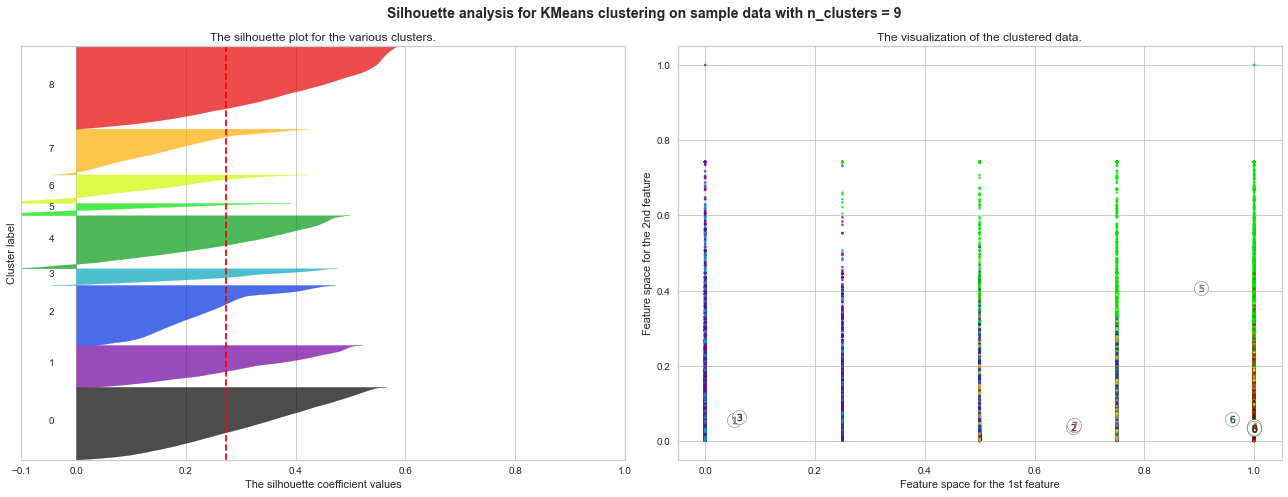

In [177]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Best K : 
K=5 seems to be the best choice for K means

## VI-2  K_PROTOTYPES CLUSTERING :

https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb#:~:text=We%20are%20using%20the%20Elbow,for%20numerical%20and%20categorical%20variables.

In [178]:
df_pro = pd.read_csv('data.csv')

In [179]:
df_pro.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,distance,prodcut_volume,delivery_time_d,proposed_delivery_time_d,Diff_delivery_time_d,Diff_review_time_d,Diff_shipping_limit_ord_app,Recency,Frequency,Monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05,...,3.143946,107136.0,8,19,10,4,6,474,1,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-28 00:09:50,2017-12-19,...,22.637876,107136.0,18,39,20,2,12,298,1,275.79


In [180]:
df_pro.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'review_score', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_weight_g', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'transaction',
       'seller_geolocation_lat', 'seller_geolocation_lng',
       'customer_geolocation_lat', 'customer_geolocation_lng', 'distance',
       'prodcut_volume', 'delivery_time_d', 'proposed_delivery_time_d',
       'Diff_delivery_time_d', 'Diff_review_time_d',
       'Diff_shipping_limit_ord_app', 'Recency', 'Frequenc

In [181]:
list_to_delete_2 = list(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix','order_status',
                      'order_delivered_customer_date', 'order_estimated_delivery_date','order_item_id', 'product_id', 'seller_id', 'shipping_limit_date','review_comment_message',
                      'review_creation_date', 'review_answer_timestamp','transaction','seller_geolocation_lat', 'seller_geolocation_lng','customer_geolocation_lat', 'customer_geolocation_lng'
                       ,'seller_zip_code_prefix','order_approved_at','order_purchase_timestamp','Diff_delivery_time_d','Diff_review_time_d','Diff_shipping_limit_ord_app',
                        'payment_sequential','freight_value','price'])

In [182]:
df_pro.drop(list_to_delete_2,axis=1,inplace=True)

In [185]:
df_pro.head(2)

,customer_city,customer_state,review_score,product_category_name,product_weight_g,seller_city,seller_state,payment_type,payment_installments,payment_value,distance,prodcut_volume,delivery_time_d,proposed_delivery_time_d,Recency,Frequency,Monetary
0,franca,SP,4,moveis_escritorio,8683.0,itaquaquecetuba,SP,credit_card,2,146.87,3.143946,107136.0,8,19,474,1,146.87
1,santarem,PA,1,moveis_escritorio,8683.0,itaquaquecetuba,SP,credit_card,1,275.79,22.637876,107136.0,18,39,298,1,275.79


In [184]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97916 entries, 0 to 97915
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_city             97916 non-null  object 
 1   customer_state            97916 non-null  object 
 2   review_score              97916 non-null  int64  
 3   product_category_name     97916 non-null  object 
 4   product_weight_g          97916 non-null  float64
 5   seller_city               97916 non-null  object 
 6   seller_state              97916 non-null  object 
 7   payment_type              97916 non-null  object 
 8   payment_installments      97916 non-null  int64  
 9   payment_value             97916 non-null  float64
 10  distance                  97916 non-null  float64
 11  prodcut_volume            97916 non-null  float64
 12  delivery_time_d           97916 non-null  int64  
 13  proposed_delivery_time_d  97916 non-null  int64  
 14  Recenc

In [186]:
# Get the position of categorical columns
catColumnsPos = [df_pro.columns.get_loc(col) for col in list(df_pro.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df_pro.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['customer_city', 'customer_state', 'product_category_name', 'seller_city', 'seller_state', 'payment_type']
Categorical columns position  : [0, 1, 3, 5, 6, 7]


In [187]:
# Convert dataframe to matrix
dfMatrix = df_pro.to_numpy()
dfMatrix

array([['franca', 'SP', 4, ..., 474, 1, 146.87],
       ['santarem', 'PA', 1, ..., 298, 1, 275.79],
       ['nova santa rita', 'RS', 3, ..., 483, 1, 140.61],
       ...,
       ['guarulhos', 'SP', 3, ..., 13, 1, 775.98],
       ['uruacu', 'GO', 5, ..., 15, 1, 224.44],
       ['bom repouso', 'MG', 1, ..., 292, 1, 167.79]], dtype=object)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/10, moves: 5259, ncost: 22364252921528.07
Run: 1, iteration: 2/10, moves: 3178, ncost: 21588473689659.793
Run: 1, iteration: 3/10, moves: 1275, ncost: 21422981541490.824
Run: 1, iteration: 4/10, moves: 647, ncost: 21374090845567.8
Run: 1, iteration: 5/10, moves: 151, ncost: 21371601113541.723
Run: 1, iteration: 6/10, moves: 6, ncost: 21371596195253.816
Run: 1, iteration: 7/10, moves: 0, ncost: 21371596195253.816
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/10, moves: 1090, ncost: 21441685995277.953
Run: 2, iteration: 2/10, moves: 722, ncost: 21376520167555.86
Run: 2, iteration: 3/10, moves: 195, ncost: 21371685240916.47
Run: 2, iteration: 4/10, moves: 26, ncost: 21371603196263.18
Run: 2, iteration: 5/10, moves: 8, ncost: 21371596195253.816
Run: 2, iteration

<function matplotlib.pyplot.show(close=None, block=None)>

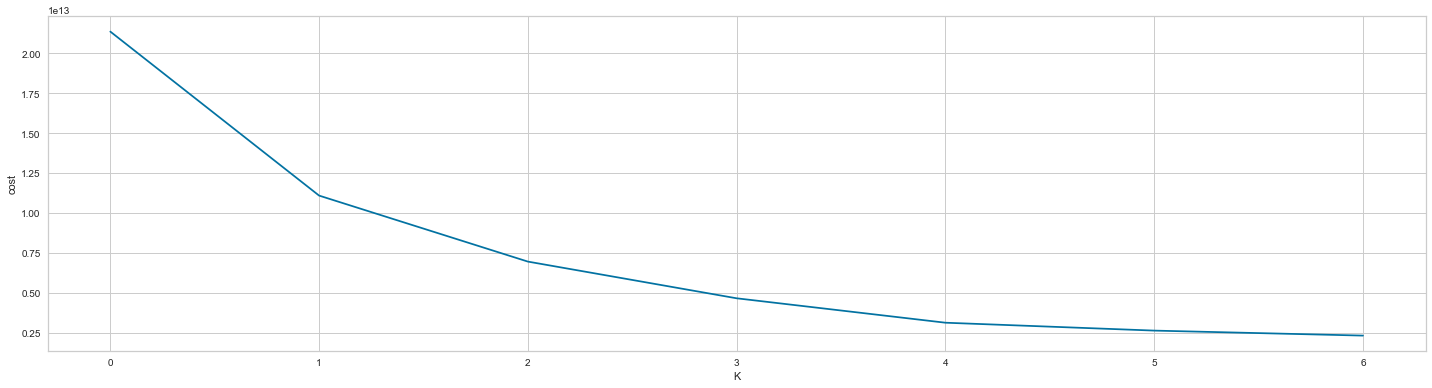

In [189]:
# No scaling of numerical columns of dataframe
#Choosing optimal K value
k_clusters = [2,3,4,5,6,7,8]
cost = []
X = df_pro
for num_clusters in k_clusters:
    kproto = KPrototypes(n_clusters=num_clusters, random_state=42,verbose=1,max_iter=10) 
    kproto.fit_predict(X, categorical=[0, 1, 3, 5, 6, 7])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

### best K : 
K=4 seems to be the best choice for K prototypes

## VI-3 DBSCAN CLUSTERING :

In [18]:
df2 = pd.read_csv('data.csv')

In [19]:
list_to_delete_dbscan = list(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix','customer_city', 'customer_state', 'order_status','order_purchase_timestamp', 'order_approved_at',
                      'order_delivered_customer_date', 'order_estimated_delivery_date','order_item_id', 'product_id', 'seller_id', 'shipping_limit_date','review_comment_message',
                      'review_creation_date', 'review_answer_timestamp','transaction','seller_geolocation_lat', 'seller_geolocation_lng','customer_geolocation_lat', 'customer_geolocation_lng','product_category_name',
                       'payment_type','seller_zip_code_prefix','seller_city','seller_state','payment_sequential','price', 'freight_value',
                      'Diff_delivery_time_d','Diff_review_time_d', 'Diff_shipping_limit_ord_app'])

In [20]:
df2.drop(list_to_delete_dbscan, axis=1, inplace=True)

In [21]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df2)

In [22]:
print('matrix shape :',X.shape)
clustering = DBSCAN(eps=0.06, min_samples=20
                    ).fit(X)
cluster = clustering.labels_

matrix shape : (97916, 8)


In [23]:
# check how many clusters were found during processing
len(set(cluster))

8

In [24]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(cluster)) - (1 if -1 in cluster else 0)
n_noise_ = list(cluster).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, cluster))

Estimated number of clusters: 7
Estimated number of noise points: 10780
Silhouette Coefficient: 0.305


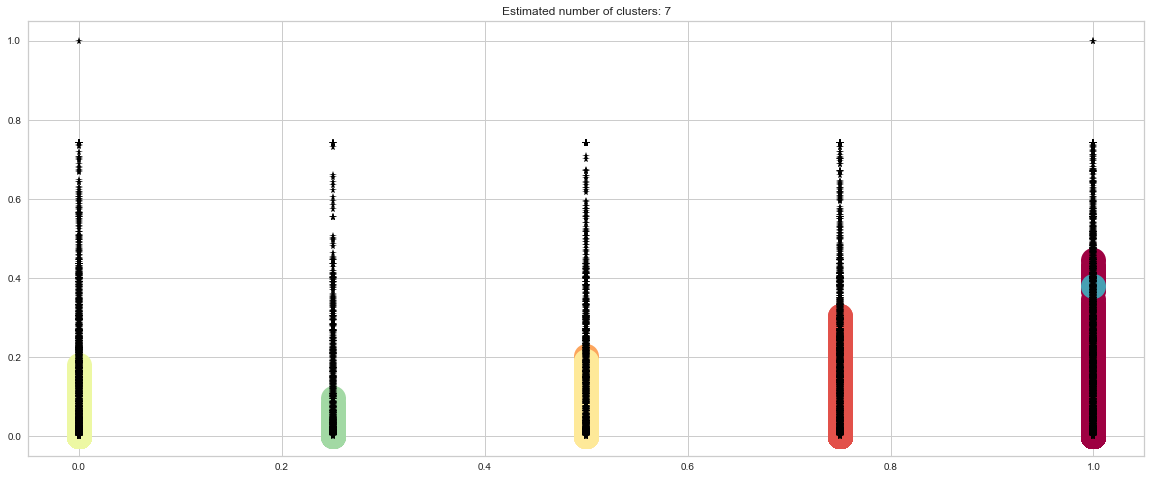

In [25]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (20,8)


core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True

# Black removed and is used for noise instead.
unique_labels = set(cluster)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = cluster == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=25,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "*",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=8,
    )
#figure(figsize=(8, 10), dpi=80)
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

# VII-  ARI CALCULATION AND MODEL STABILITY :

In [191]:
df_m = pd.read_csv('data.csv')

In [192]:
print('******************')
print('Dataframe : df_m')
print('******************')
df_m.head(2)

******************
Dataframe : df_m
******************


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_status,order_purchase_timestamp,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,...,distance,prodcut_volume,delivery_time_d,proposed_delivery_time_d,Diff_delivery_time_d,Diff_review_time_d,Diff_shipping_limit_ord_app,Recency,Frequency,Monetary
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-25 10:35:35,2017-06-05,...,3.143946,107136.0,8,19,10,4,6,474,1,146.87
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-28 00:09:50,2017-12-19,...,22.637876,107136.0,18,39,20,2,12,298,1,275.79


In [193]:
df_m['order_purchase_timestamp'] = pd.to_datetime(df_m['order_purchase_timestamp']).dt.date

In [194]:
print('********************************************************************************')
print('First Dataframe Date  : ',df_m['order_purchase_timestamp'].min(),
      '   ','Last Dataframe Date  : ',df_m['order_purchase_timestamp'].max())
print('********************************************************************************')

********************************************************************************
First Dataframe Date  :  2016-09-04     Last Dataframe Date  :  2018-09-03
********************************************************************************


In [195]:
import datetime
from datetime import date, timedelta

In [ ]:
##############################################################################

In [ ]:
##############################################################################

## VII-1 ARI calculation 

In [379]:
df_m = pd.read_csv('data.csv')

In [380]:
df_m['order_purchase_timestamp'] = pd.to_datetime(df_m['order_purchase_timestamp']).dt.date

In [381]:
df_m = df_m.sort_values('order_purchase_timestamp',ascending=True)

In [382]:
df_m.shape

(97916, 44)

In [383]:
from sklearn.metrics.cluster import adjusted_rand_score

2016-09-04


Provide delta time for first interval    : 60


***********************************************
number of days to define other intervals is   : 15
***********************************************
***********************************************
first interval : 2016-09-04     2016-11-03
Second interval: 2016-11-03     2016-11-18
Third interval : 2016-11-18     2016-12-03
4 th  interval : 2016-12-03     2016-12-18
5 th  interval : 2016-12-18     2017-01-02
6 th interval  : 2017-01-02     2017-01-17
7 th interval  : 2017-01-17     2017-02-01
8 th interval  : 2017-02-01     2017-02-16
9 th interval  : 2017-02-16     2017-03-03
10 th interval  : 2017-03-03     2017-03-18
***********************************************


C:\Users\AMC\AppData\Local\Temp\ipykernel_2128\413499057.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m1.drop(list_to_delete_2,axis=1,inplace=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_2128\413499057.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m2.drop(list_to_delete_2,axis=1,inplace=True)
C:\Users\AMC\AppData\Local\Temp\ipykernel_2128\413499057.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m3.drop(

***********************************************
*****************************************


input cluster number    : 4


*****************************************


C:\Users\AMC\AppData\Local\Temp\ipykernel_2128\413499057.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m1.loc[:,numeric_cols] = scaler.fit_transform(df_m1.loc[:,numeric_cols])
C:\Users\AMC\AppData\Local\Temp\ipykernel_2128\413499057.py:83: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m2.loc[:,numeric_cols] = scaler.fit_transform(df_m2.loc[:,numeric_cols])
C:\Users\AMC\AppData\Local\Temp\ipykernel_2128\413499057.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

ARI results   : 
ARI 1 vs 2   : 1.0
ARI 1 vs 3   : 1.0
ARI 1 vs 4   : 1.0
ARI 1 vs 5   : 1.0
ARI 1 vs 6   : 0.9221116759158227
ARI 1 vs 7   : 0.6022200020001802
ARI 1 vs 8   : 0.6022200020001802
ARI 1 vs 9   : 0.6022200020001802
ARI 1 vs 10   : 0.6022200020001802


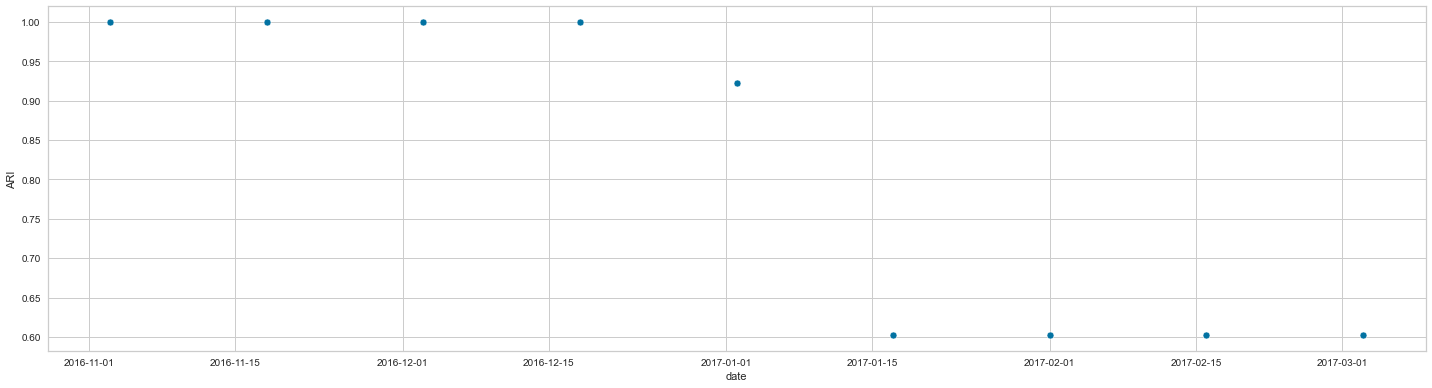

In [385]:
# Define first DATAFRAME :
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

date1 = df_m['order_purchase_timestamp'].min()
print(date1)

interval1 = int(input('Provide delta time for first interval    :'))
interval2 = 15

date2 = date1 + timedelta(days=interval1)
date3 = date2 + timedelta(days=interval2)
date4 = date3 + timedelta(days=interval2)
date5 = date4 + timedelta(days=interval2)
date6 = date5 + timedelta(days=interval2)
date7 = date6 + timedelta(days=interval2)
date8 = date7 + timedelta(days=interval2)
date9 = date8 + timedelta(days=interval2)
date10 = date9 + timedelta(days=interval2)
date11 = date10 + timedelta(days=interval2)

print('***********************************************')
print('number of days to define other intervals is   :',interval2)
print('***********************************************')
print('***********************************************')
print('first interval :',date1,'   ',date2)
print('Second interval:',date2,'   ',date3)
print('Third interval :',date3,'   ',date4)
print('4 th  interval :',date4,'   ',date5)
print('5 th  interval :',date5,'   ',date6)
print('6 th interval  :',date6,'   ',date7)
print('7 th interval  :',date7,'   ',date8)
print('8 th interval  :',date8,'   ',date9)
print('9 th interval  :',date9,'   ',date10)
print('10 th interval  :',date10,'   ',date11)
print('***********************************************')

df_m1 = df_m.loc[df_m['order_purchase_timestamp']<=date2]
df_m2 = df_m.loc[df_m['order_purchase_timestamp']<=date3]
df_m3 = df_m.loc[df_m['order_purchase_timestamp']<=date4]
df_m4 = df_m.loc[df_m['order_purchase_timestamp']<=date5]
df_m5 = df_m.loc[df_m['order_purchase_timestamp']<=date6]
df_m6 = df_m.loc[df_m['order_purchase_timestamp']<=date7]
df_m7 = df_m.loc[df_m['order_purchase_timestamp']<=date8]
df_m8 = df_m.loc[df_m['order_purchase_timestamp']<=date9]
df_m9 = df_m.loc[df_m['order_purchase_timestamp']<=date10]
df_m10 = df_m.loc[df_m['order_purchase_timestamp']<=date11]

list_to_delete_2 = list(['customer_unique_id', 'customer_zip_code_prefix','order_status',
                      'order_delivered_customer_date', 'order_estimated_delivery_date','order_item_id', 'product_id', 'seller_id', 'shipping_limit_date','review_comment_message',
                      'review_creation_date', 'review_answer_timestamp','transaction','seller_geolocation_lat', 'seller_geolocation_lng','customer_geolocation_lat', 'customer_geolocation_lng'
                       ,'seller_zip_code_prefix','order_approved_at','order_purchase_timestamp','Diff_delivery_time_d','Diff_review_time_d','Diff_shipping_limit_ord_app',
                        'payment_sequential','freight_value','price',
                        'proposed_delivery_time_d','customer_city','customer_state','product_category_name','seller_city','seller_state',
                        'prodcut_volume','product_weight_g','payment_installments','delivery_time_d','distance'])

df_m1.drop(list_to_delete_2,axis=1,inplace=True)
df_m2.drop(list_to_delete_2,axis=1,inplace=True)
df_m3.drop(list_to_delete_2,axis=1,inplace=True)
df_m4.drop(list_to_delete_2,axis=1,inplace=True)
df_m5.drop(list_to_delete_2,axis=1,inplace=True)
df_m6.drop(list_to_delete_2,axis=1,inplace=True)
df_m7.drop(list_to_delete_2,axis=1,inplace=True)
df_m8.drop(list_to_delete_2,axis=1,inplace=True)
df_m9.drop(list_to_delete_2,axis=1,inplace=True)
df_m10.drop(list_to_delete_2,axis=1,inplace=True)

print('***********************************************')

print('*****************************************')
cluster = int(input('input cluster number    :'))
print('*****************************************')

# Scaling numerical columns of dataframe
# Check the scaler , and use MinMaxScaler
scaler = MinMaxScaler()

# Identify numeric columns to be scaled
numeric_cols = list(df_m1.dtypes[df_m1.dtypes != 'object'].index)

# Apply 'scaler' to numerical features
df_m1.loc[:,numeric_cols] = scaler.fit_transform(df_m1.loc[:,numeric_cols])
df_m2.loc[:,numeric_cols] = scaler.fit_transform(df_m2.loc[:,numeric_cols])
df_m3.loc[:,numeric_cols] = scaler.fit_transform(df_m3.loc[:,numeric_cols])
df_m4.loc[:,numeric_cols] = scaler.fit_transform(df_m4.loc[:,numeric_cols])
df_m5.loc[:,numeric_cols] = scaler.fit_transform(df_m5.loc[:,numeric_cols])
df_m6.loc[:,numeric_cols] = scaler.fit_transform(df_m6.loc[:,numeric_cols])
df_m7.loc[:,numeric_cols] = scaler.fit_transform(df_m7.loc[:,numeric_cols])
df_m8.loc[:,numeric_cols] = scaler.fit_transform(df_m8.loc[:,numeric_cols])
df_m9.loc[:,numeric_cols] = scaler.fit_transform(df_m9.loc[:,numeric_cols])
df_m10.loc[:,numeric_cols] = scaler.fit_transform(df_m10.loc[:,numeric_cols])

# Get the position of categorical columns
catColumnsPos = [df_m1.columns.get_loc(col) for col in list(df_m1.select_dtypes('object').columns)]


# Convert dataframe to matrix
dfMatrix_1 = df_m1.to_numpy()
dfMatrix_2 = df_m2.to_numpy()
dfMatrix_3 = df_m3.to_numpy()
dfMatrix_4 = df_m4.to_numpy()
dfMatrix_5 = df_m5.to_numpy()
dfMatrix_6 = df_m6.to_numpy()
dfMatrix_7 = df_m7.to_numpy()
dfMatrix_8 = df_m8.to_numpy()
dfMatrix_9 = df_m9.to_numpy()
dfMatrix_10 = df_m10.to_numpy()

# Fit the cluster
kprototype_1 = KPrototypes(n_clusters = cluster,init = 'Huang', random_state = 42)
kprototype_1.fit_predict(dfMatrix_1, categorical = catColumnsPos)

kprototype_2 = KPrototypes(n_clusters = cluster,init = 'Huang', random_state = 42)
kprototype_2.fit_predict(dfMatrix_2, categorical = catColumnsPos)

kprototype_3 = KPrototypes(n_clusters = cluster,init = 'Huang', random_state = 42)
kprototype_3.fit_predict(dfMatrix_3, categorical = catColumnsPos)

kprototype_4 = KPrototypes(n_clusters = cluster,init = 'Huang', random_state = 42)
kprototype_4.fit_predict(dfMatrix_4, categorical = catColumnsPos)

kprototype_5 = KPrototypes(n_clusters = cluster,init = 'Huang', random_state = 42)
kprototype_5.fit_predict(dfMatrix_5, categorical = catColumnsPos)

kprototype_6 = KPrototypes(n_clusters = cluster,init = 'Huang', random_state = 42)
kprototype_6.fit_predict(dfMatrix_6, categorical = catColumnsPos)

kprototype_7 = KPrototypes(n_clusters = cluster,init = 'Huang', random_state = 42)
kprototype_7.fit_predict(dfMatrix_7, categorical = catColumnsPos)

kprototype_8 = KPrototypes(n_clusters = cluster,init = 'Huang', random_state = 42)
kprototype_8.fit_predict(dfMatrix_8, categorical = catColumnsPos)

kprototype_9 = KPrototypes(n_clusters = cluster,init = 'Huang', random_state = 42)
kprototype_9.fit_predict(dfMatrix_9, categorical = catColumnsPos)

kprototype_10 = KPrototypes(n_clusters = cluster,init = 'Huang', random_state = 42)
kprototype_10.fit_predict(dfMatrix_10, categorical = catColumnsPos)


df_m1['cluster_id'] = kprototype_1.labels_
df_m2['cluster_id'] = kprototype_2.labels_ 
df_m3['cluster_id'] = kprototype_3.labels_
df_m4['cluster_id'] = kprototype_4.labels_
df_m5['cluster_id'] = kprototype_5.labels_ 
df_m6['cluster_id'] = kprototype_6.labels_ 
df_m7['cluster_id'] = kprototype_7.labels_ 
df_m8['cluster_id'] = kprototype_8.labels_ 
df_m9['cluster_id'] = kprototype_9.labels_ 
df_m10['cluster_id'] = kprototype_10.labels_ 

# Adjust shape of df_m1
df_m2 = df_m2.head(df_m1.shape[0])
df_m3 = df_m3.head(df_m1.shape[0])
df_m4 = df_m4.head(df_m1.shape[0])
df_m5 = df_m5.head(df_m1.shape[0])
df_m6 = df_m6.head(df_m1.shape[0])
df_m7 = df_m7.head(df_m1.shape[0])
df_m8 = df_m8.head(df_m1.shape[0])
df_m9 = df_m9.head(df_m1.shape[0])
df_m10 = df_m10.head(df_m1.shape[0])

# ARI calculation :

print('ARI results   : ')
x1 = adjusted_rand_score(df_m1['cluster_id'],df_m2['cluster_id'])
x2 = adjusted_rand_score(df_m1['cluster_id'],df_m3['cluster_id'])
x3 = adjusted_rand_score(df_m1['cluster_id'],df_m4['cluster_id'])
x4 = adjusted_rand_score(df_m1['cluster_id'],df_m5['cluster_id'])
x5 = adjusted_rand_score(df_m1['cluster_id'],df_m6['cluster_id'])
x6 = adjusted_rand_score(df_m1['cluster_id'],df_m7['cluster_id'])
x7 = adjusted_rand_score(df_m1['cluster_id'],df_m8['cluster_id'])
x8 = adjusted_rand_score(df_m1['cluster_id'],df_m9['cluster_id'])
x9 = adjusted_rand_score(df_m1['cluster_id'],df_m10['cluster_id'])

print('ARI 1 vs 2   :',adjusted_rand_score(df_m1['cluster_id'],df_m2['cluster_id']))
print('ARI 1 vs 3   :',adjusted_rand_score(df_m1['cluster_id'],df_m3['cluster_id']))
print('ARI 1 vs 4   :',adjusted_rand_score(df_m1['cluster_id'],df_m4['cluster_id']))
print('ARI 1 vs 5   :',adjusted_rand_score(df_m1['cluster_id'],df_m5['cluster_id']))
print('ARI 1 vs 6   :',adjusted_rand_score(df_m1['cluster_id'],df_m6['cluster_id']))
print('ARI 1 vs 7   :',adjusted_rand_score(df_m1['cluster_id'],df_m7['cluster_id']))
print('ARI 1 vs 8   :',adjusted_rand_score(df_m1['cluster_id'],df_m8['cluster_id']))
print('ARI 1 vs 9   :',adjusted_rand_score(df_m1['cluster_id'],df_m9['cluster_id']))
print('ARI 1 vs 10   :',adjusted_rand_score(df_m1['cluster_id'],df_m10['cluster_id']))

data_1 = {'date': [date2,date3, date4,date5,date6,date7,date8,date9,date10],
                   'ARI': [x1,x2,x3,x4,x5,x6,x7,x8,x9]
                   }
df1 = pd.DataFrame(data_1)

# ARI PLOT OF MODEL STABILITY :
sns.scatterplot(x=df1['date'],y=df1['ARI'])
plt.show()

# VIII- Clustering explicability

In [ ]:
# Explain clustering and features importances
# Using K-prototype with optimal 5 clusters on all dataframe

In [390]:
df_explain = pd.read_csv('data.csv')

In [391]:
list_to_delete_2 = list(['customer_unique_id', 'customer_zip_code_prefix','order_status',
                      'order_delivered_customer_date', 'order_estimated_delivery_date','order_item_id', 'product_id', 'seller_id', 'shipping_limit_date','review_comment_message',
                      'review_creation_date', 'review_answer_timestamp','transaction','seller_geolocation_lat', 'seller_geolocation_lng','customer_geolocation_lat', 'customer_geolocation_lng'
                       ,'seller_zip_code_prefix','order_approved_at','order_purchase_timestamp','Diff_delivery_time_d','Diff_review_time_d','Diff_shipping_limit_ord_app',
                        'payment_sequential','freight_value','price',
                        'proposed_delivery_time_d','customer_city','customer_state','product_category_name','seller_city','seller_state',
                        'prodcut_volume','product_weight_g','payment_installments','delivery_time_d','distance'])

df_explain.drop(list_to_delete_2,axis=1,inplace=True)

print('*****************************************')
cluster = int(input('input cluster number    :'))
print('*****************************************')

# Scaling numerical columns of dataframe
# Check the scaler , and use MinMaxScaler
scaler = MinMaxScaler()

# Identify numeric columns to be scaled
numeric_cols = list(df_explain.dtypes[df_explain.dtypes != 'object'].index)

# Apply 'scaler' to numerical features
df_explain.loc[:,numeric_cols] = scaler.fit_transform(df_explain.loc[:,numeric_cols])

# Get the position of categorical columns
catColumnsPos = [df_explain.columns.get_loc(col) for col in list(df_explain.select_dtypes('object').columns)]


# Convert dataframe to matrix
#dfMatrix_1 = df_explain.to_numpy()

# Fit the cluster
kprototype_1 = KPrototypes(n_clusters = cluster,init = 'Huang', random_state = 42)
kprototype_1.fit_predict(dfMatrix_1, categorical = catColumnsPos)

*****************************************


input cluster number    : 4


*****************************************


array([0, 1, 0, ..., 1, 3, 1], dtype=uint16)

In [393]:
df_explain.loc[:,numeric_cols] = scaler.inverse_transform(df_explain.loc[:,numeric_cols])

In [394]:
df_explain['cluster_id'] = kprototype_1.labels_

In [395]:
df_explain.head(10)

,customer_id,review_score,payment_type,payment_value,Recency,Frequency,Monetary,cluster_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,4.000,credit_card,146.870,474.000,1.000,146.870,0
1,8912fc0c3bbf1e2fbf35819e21706718,1.000,credit_card,275.790,298.000,1.000,275.790,1
2,f0ac8e5a239118859b1734e1087cbb1f,3.000,credit_card,140.610,483.000,1.000,140.610,0
3,6bc8d08963a135220ed6c6d098831f84,4.000,credit_card,137.580,211.000,1.000,137.580,3
4,fd3a0b1bd209f0e7d420c9c3d1127613,4.000,credit_card,142.050,528.000,1.000,142.050,0
5,fbd40c083aa8cddebb5265b2ba6aaf2e,4.000,boleto,155.700,474.000,1.000,155.700,2
6,10558ef4afea173bfb5e2cbe3d5b0bb5,2.000,credit_card,148.330,533.000,1.000,148.330,1
7,1c37c0f0cd1d88d46d9fc9494762abbd,3.000,credit_card,150.070,172.000,1.000,150.070,1
8,20a452f528d487411fd7d3ebda1d0f20,2.000,boleto,257.500,219.000,1.000,257.500,1
9,62f766c82849282806bf2f62ca86432e,4.000,credit_card,843.660,481.000,1.000,843.660,0


In [396]:
df_explain.describe()

,review_score,payment_value,Recency,Frequency,Monetary,cluster_id
count,97916.000,97916.000,97916.000,97916.000,97916.000,97916.000
mean,4.105,157.742,241.755,1.077,168.628,1.637
std,1.331,216.862,152.979,0.383,232.300,1.216
min,1.000,0.010,0.000,1.000,0.010,0.000
25%,4.000,60.000,118.000,1.000,62.517,0.000
50%,5.000,103.260,222.000,1.000,108.630,2.000
75%,5.000,174.990,350.000,1.000,187.060,3.000
max,5.000,13664.080,728.000,16.000,13664.080,3.000


In [397]:
df_explain['cluster_id'].value_counts()

3    35312
0    25794
1    19312
2    17498
Name: cluster_id, dtype: int64

In [400]:
cluster_0 = df_explain.loc[df_explain['cluster_id']==0]
cluster_1 = df_explain.loc[df_explain['cluster_id']==1]
cluster_2 = df_explain.loc[df_explain['cluster_id']==2]
cluster_3 = df_explain.loc[df_explain['cluster_id']==3]

In [410]:
include =['object', 'float', 'int']
perc =[.50, .75]
cluster_0.describe(percentiles = perc, include = include)

,customer_id,review_score,payment_type,payment_value,Recency,Frequency,Monetary
count,25794,25794.000,25794,25794.000,25794.000,25794.000,25794.000
unique,25794,NaN,4,NaN,NaN,NaN,NaN
top,06b8999e2fba1a1fbc88172c00ba8bc7,NaN,credit_card,NaN,NaN,NaN,NaN
freq,1,NaN,24781,NaN,NaN,NaN,NaN
mean,NaN,4.670,NaN,159.016,398.979,1.062,167.925
std,NaN,0.545,NaN,215.429,95.771,0.269,232.679
min,NaN,3.000,NaN,0.010,256.000,1.000,0.010
50%,NaN,5.000,NaN,103.145,388.000,1.000,107.780
75%,NaN,5.000,NaN,176.338,472.000,1.000,186.597
max,NaN,5.000,NaN,6929.310,699.000,4.000,7571.630


In [408]:
# Univariate data for each cluster group
cluster_0.describe() , cluster_1.describe(),cluster_2.describe(),cluster_3.describe()

(       review_score  payment_value   Recency  Frequency  Monetary  cluster_id
 count     25794.000      25794.000 25794.000  25794.000 25794.000   25794.000
 mean          4.670        159.016   398.979      1.062   167.925       0.000
 std           0.545        215.429    95.771      0.269   232.679       0.000
 min           3.000          0.010   256.000      1.000     0.010       0.000
 25%           4.000         61.010   315.000      1.000    62.830       0.000
 50%           5.000        103.145   388.000      1.000   107.780       0.000
 75%           5.000        176.338   472.000      1.000   186.597       0.000
 max           5.000       6929.310   699.000      4.000  7571.630       0.000,
        review_score  payment_value   Recency  Frequency  Monetary  cluster_id
 count     19312.000      19312.000 19312.000  19312.000 19312.000   19312.000
 mean          1.721        176.347   233.529      1.070   187.170       1.000
 std           0.874        258.419   138.093      

In [414]:
cluster_0['payment_type'].value_counts(),cluster_1['payment_type'].value_counts(),cluster_3['payment_type'].value_counts(),cluster_3['payment_type'].value_counts()

(credit_card    24781
 voucher          754
 debit_card       219
 boleto            40
 Name: payment_type, dtype: int64,
 credit_card    15725
 boleto          2705
 voucher          587
 debit_card       295
 Name: payment_type, dtype: int64,
 credit_card    33804
 debit_card       759
 voucher          749
 Name: payment_type, dtype: int64,
 credit_card    33804
 debit_card       759
 voucher          749
 Name: payment_type, dtype: int64)

In [415]:
cluster_0['review_score'].value_counts(),cluster_1['review_score'].value_counts(),cluster_3['review_score'].value_counts(),cluster_3['review_score'].value_counts()

(5.000    18261
 4.000     6555
 3.000      978
 Name: review_score, dtype: int64,
 1.000    10813
 3.000     5428
 2.000     3071
 Name: review_score, dtype: int64,
 5.000    26955
 4.000     8357
 Name: review_score, dtype: int64,
 5.000    26955
 4.000     8357
 Name: review_score, dtype: int64)

In [419]:
cluster_0['Frequency'].value_counts(bins=[0,2,4,8,10,50]),cluster_1['Frequency'].value_counts(bins=[0,2,4,8,10,50]),cluster_3['Frequency'].value_counts(bins=[0,2,4,8,10,50]),cluster_3['Frequency'].value_counts(bins=[0,2,4,8,10,50])

((-0.001, 2.0]    25650
 (2.0, 4.0]         144
 (4.0, 8.0]           0
 (8.0, 10.0]          0
 (10.0, 50.0]         0
 Name: Frequency, dtype: int64,
 (-0.001, 2.0]    19194
 (2.0, 4.0]          98
 (4.0, 8.0]          12
 (8.0, 10.0]          8
 (10.0, 50.0]         0
 Name: Frequency, dtype: int64,
 (-0.001, 2.0]    34939
 (2.0, 4.0]         293
 (4.0, 8.0]          63
 (10.0, 50.0]        16
 (8.0, 10.0]          1
 Name: Frequency, dtype: int64,
 (-0.001, 2.0]    34939
 (2.0, 4.0]         293
 (4.0, 8.0]          63
 (10.0, 50.0]        16
 (8.0, 10.0]          1
 Name: Frequency, dtype: int64)

In [422]:
cluster_0['payment_value'].value_counts(bins=[0,50,100,500,1000,20000]),cluster_1['Frequency'].value_counts(bins=[0,50,100,500,1000,20000]),cluster_3['Frequency'].value_counts(bins=[0,50,100,500,1000,20000]),cluster_3['Frequency'].value_counts(bins=[0,50,100,500,1000,20000])

((100.0, 500.0]       12168
 (50.0, 100.0]         7884
 (-0.001, 50.0]        4635
 (500.0, 1000.0]        804
 (1000.0, 20000.0]      303
 Name: payment_value, dtype: int64,
 (-0.001, 50.0]       19312
 (50.0, 100.0]            0
 (100.0, 500.0]           0
 (500.0, 1000.0]          0
 (1000.0, 20000.0]        0
 Name: Frequency, dtype: int64,
 (-0.001, 50.0]       35312
 (50.0, 100.0]            0
 (100.0, 500.0]           0
 (500.0, 1000.0]          0
 (1000.0, 20000.0]        0
 Name: Frequency, dtype: int64,
 (-0.001, 50.0]       35312
 (50.0, 100.0]            0
 (100.0, 500.0]           0
 (500.0, 1000.0]          0
 (1000.0, 20000.0]        0
 Name: Frequency, dtype: int64)